<div style="color: #80cbc4; font-size: 34px">Projet Long     Julia VS Python VS R</div>

<div style="color: #59698d; font-size: 18px">Audrey Fortuné M2BI </div>

<div class="alert alert-block alert-success">
    Run cells in R 4.0.4
</div>

## 1) Lire un fichier .pdb

Ici, nous prenons comme exemple la structure pdb '1gh4'.

Nous utilisons le module 'bio3d' 

In [1]:
install.packages("bio3d", dependencies = TRUE)
library(bio3d)


The downloaded binary packages are in
	/var/folders/g5/n3zk3f3554xccc2gvf5jp63r0000gn/T//RtmpmR0nEl/downloaded_packages


In [2]:
# Read a PDB file from the RCSB online database
prot_file <- read.pdb("1gh4", verbose = FALSE)

  Note: Accessing on-line PDB file


In [3]:
head(prot_file$atom) 

,type,eleno,elety,alt,resid,chain,resno,insert,x,y,z,o,b,segid,elesy,charge
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,ATOM,1,N,NA,ALA,A,1,NA,7.329,-1.466,14.051,1,15.99,NA,N,NA
2,ATOM,2,CA,NA,ALA,A,1,NA,6.931,-2.835,13.612,1,17.09,NA,C,NA
3,ATOM,3,C,NA,ALA,A,1,NA,5.974,-3.443,14.634,1,18.49,NA,C,NA
4,ATOM,4,O,NA,ALA,A,1,NA,5.948,-3.031,15.791,1,17.44,NA,O,NA
5,ATOM,5,CB,NA,ALA,A,1,NA,8.165,-3.710,13.453,1,17.64,NA,C,NA
6,ATOM,6,N,NA,LEU,A,2,NA,5.191,-4.424,14.201,1,19.80,NA,N,NA


In [4]:
# summary(prot_file)
prot_file


 Call:  read.pdb(file = "1gh4", verbose = FALSE)

   Total Models#: 1
     Total Atoms#: 1089,  XYZs#: 3267  Chains#: 1  (values: A)

     Protein Atoms#: 954  (residues/Calpha atoms#: 123)
     Nucleic acid Atoms#: 0  (residues/phosphate atoms#: 0)

     Non-protein/nucleic Atoms#: 135  (residues: 128)
     Non-protein/nucleic resid values: [ CA (2), HOH (125), MPD (1) ]

   Protein sequence:
      ALWQFNGMIKCKIPSSEPLLDFNNYGCYCGLGGSGTPVDDLDRCCQTHDNCYKQAMKLDS
      CKVLVDNPYTNNYSYSCSNNEITCSSENNACEAFICNCDRNAAICFSKVPYNKEHKNLDM
      MNC

+ attr: atom, xyz, seqres, helix, sheet,
        calpha, remark, call

Protein Structure 1gh4.pdb with 1 models, 1 chains A , 123 residues, 1089 atoms

In [8]:
# Fonction pour afficher la séquence en acides aminés d'un fichier pdb

seq_aa <- function(file_name){
    text <- aa321(file_name$seqres) # pour changer le code à 3 lettres en code à 1 lettre
    text <- data.frame(text)
    for (aa in text){
        return(cat(aa, sep = ""))
    }
}

In [9]:
seq_aa(prot_file)

ALWQFNGMIKCKIPSSEPLLDFNNYGCYCGLGGSGTPVDDLDRCCQTHDNCYKQAMKLDSCKVLVDNPYTNNYSYSCSNNEITCSSENNACEAFICNCDRNAAICFSKVPYNKEHKNLDMMNC

Affichons les coordonnées des carbones α (notés CA) des 10 premiers résidus:

In [133]:
# Sélection que des Carbones alphas
ca <- atom.select(prot_file, elety = "CA")
chain <- prot_file$atom[ca$atom, c("resno","resid","x","y","z")]
for (v in 1:10) {
    cat("Residue", chain$resno[v], "with name", chain$resid[v], "coordinates [", chain$x[v], chain$y[v], chain$z[v], "] \n")
}

Residue 1 with name ALA coordinates [ 6.931 -2.835 13.612 ] 
Residue 2 with name LEU coordinates [ 4.213 -5.064 15.074 ] 
Residue 3 with name TRP coordinates [ 6.63 -6.672 17.535 ] 
Residue 4 with name GLN coordinates [ 7.459 -3.218 18.887 ] 
Residue 5 with name PHE coordinates [ 3.766 -2.321 19.136 ] 
Residue 6 with name ASN coordinates [ 3.352 -5.502 21.172 ] 
Residue 7 with name GLY coordinates [ 6.152 -4.286 23.421 ] 
Residue 8 with name MET coordinates [ 4.407 -0.933 23.9 ] 
Residue 9 with name ILE coordinates [ 1.12 -2.566 24.927 ] 
Residue 10 with name LYS coordinates [ 3.041 -4.652 27.479 ] 


In [61]:
# structure secondaire (hélice, brin, turn)
print.sse(prot_file)


Call:
  read.pdb(file = "1gh4", verbose = FALSE)

Class:
  pdbsse

Helices:  6 
         1-13 (A)      17-22 (A)      39-56 (A)     89-108 (A)    112-115 (A)
      119-123 (A)

Sheets:   2 
        75-77 (A)      82-84 (A)

Turns:   0 

Output is provided in residue numbers



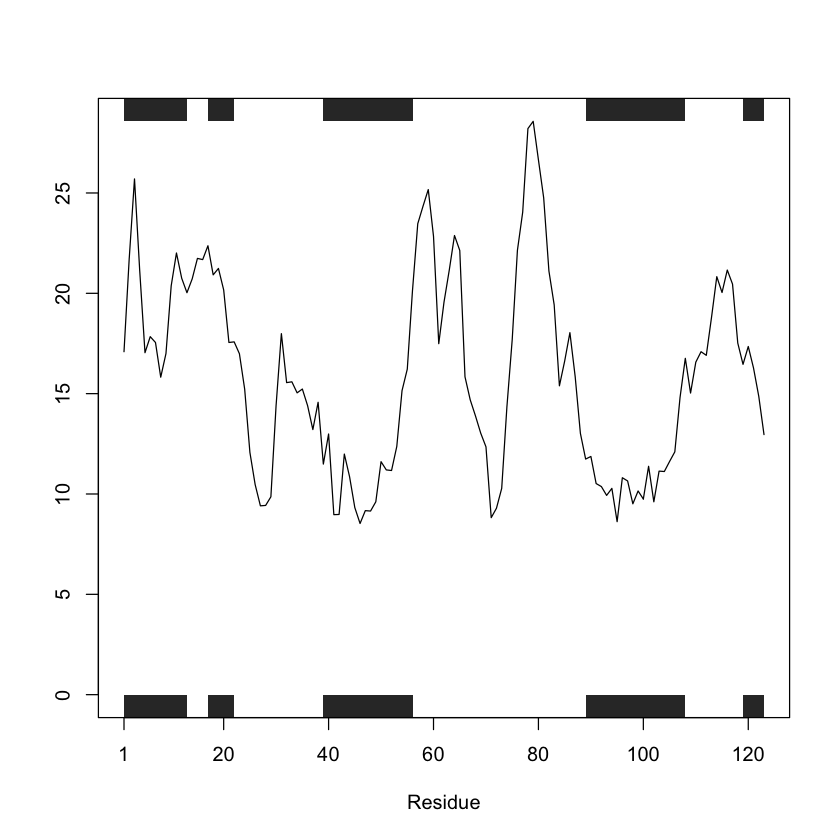

In [4]:
 # Select Calpha atoms
inds <- atom.select(prot_file, "calpha")
plot.bio3d(prot_file$atom$b[inds$atom], sse=prot_file, typ="l")

Warning message in nma.pdb(prot_file):
“Possible multi-chain structure or missing in-structure residue(s) present
  Fluctuations at neighboring positions may be affected.”


 Building Hessian...		Done in 0.011 seconds.
 Diagonalizing Hessian...	Done in 0.064 seconds.


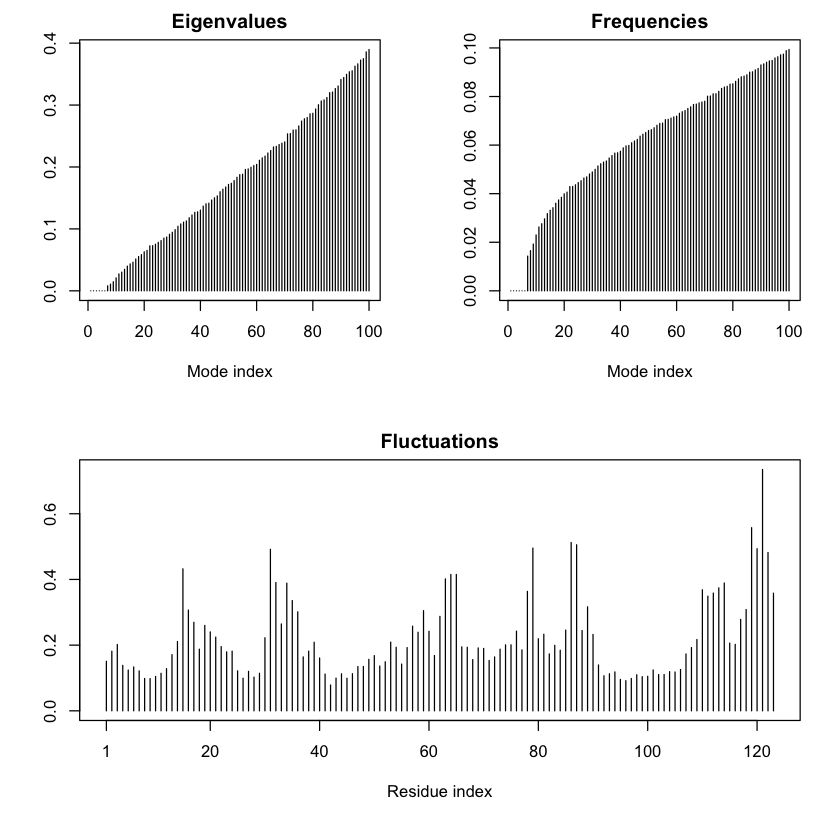

In [5]:
#a normal mode analysis (NMA) on our structure 
modes <- nma(prot_file) 
plot(modes)

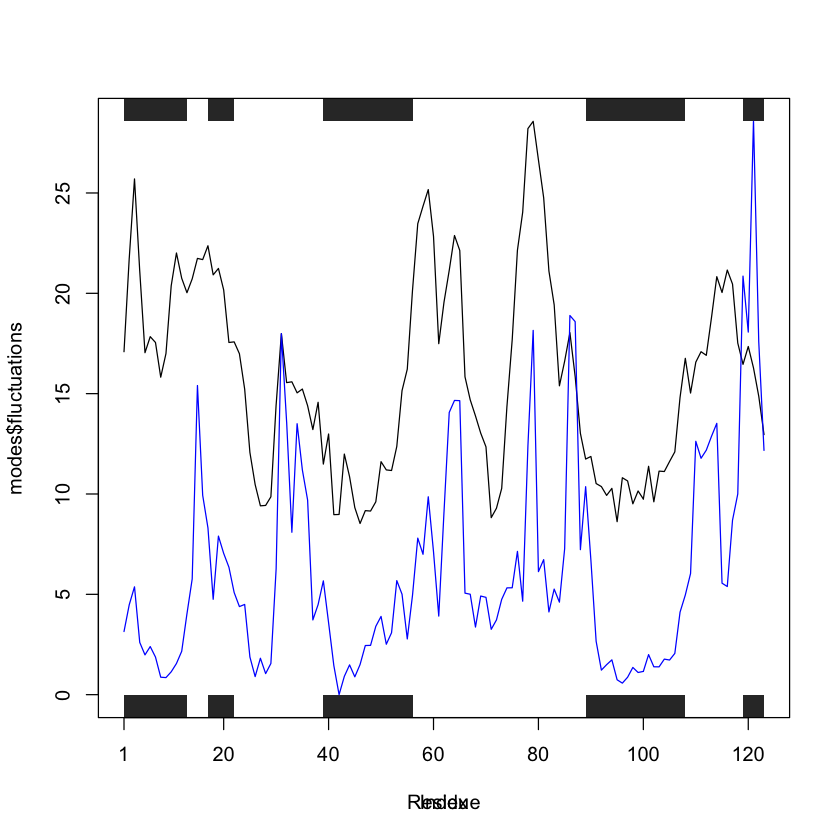

In [6]:
# Plot B-factors with NMA derived fluctuations
plot.bio3d(prot_file$atom$b[inds$atom], sse=prot_file, typ="l")
par(new=TRUE)
plot(modes$fluctuations, axes=FALSE, typ="l", col="blue")

In [ ]:
## Calculate normal modes 
modes <- gnm(prot_file)
print(modes)

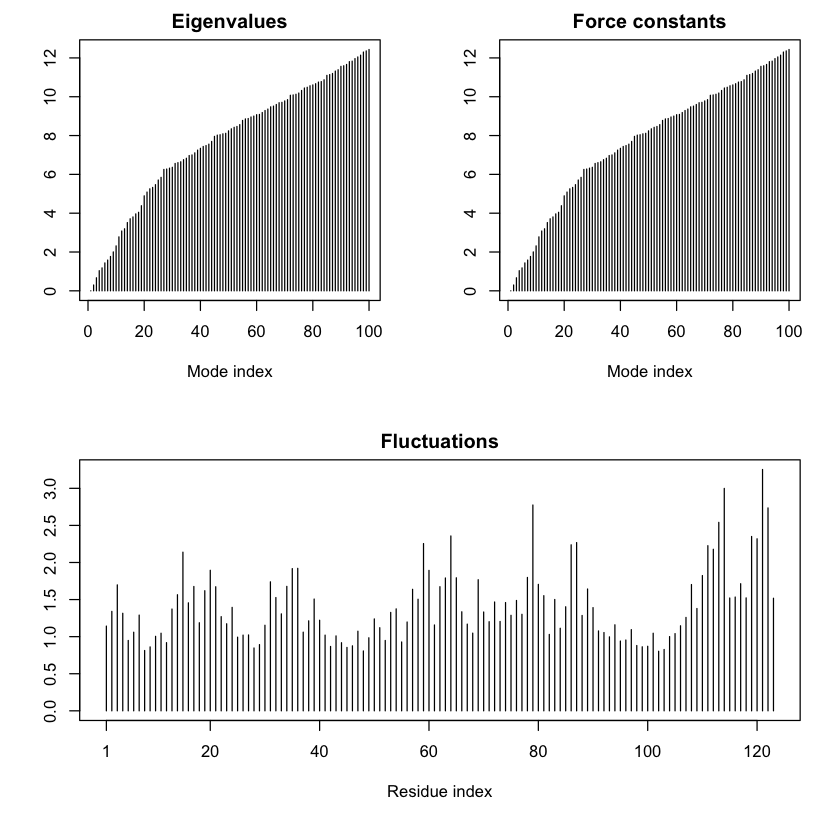

In [11]:
  ## Plot modes
plot(modes)

## 2) Visualisation de la structure

## 3) Comparer 2 séquences

In [78]:
library(Biostrings)

### * Matrice de score Blosum62

In [80]:
data(BLOSUM62)
BLOSUM62

,A,R,N,D,C,Q,E,G,H,I,⋯,S,T,W,Y,V,B,J,Z,X,*
A,4,-1,-2,-2,0,-1,-1,0,-2,-1,⋯,1,0,-3,-2,0,-2,-1,-1,-1,-4
R,-1,5,0,-2,-3,1,0,-2,0,-3,⋯,-1,-1,-3,-2,-3,-1,-2,0,-1,-4
N,-2,0,6,1,-3,0,0,0,1,-3,⋯,1,0,-4,-2,-3,4,-3,0,-1,-4
D,-2,-2,1,6,-3,0,2,-1,-1,-3,⋯,0,-1,-4,-3,-3,4,-3,1,-1,-4
C,0,-3,-3,-3,9,-3,-4,-3,-3,-1,⋯,-1,-1,-2,-2,-1,-3,-1,-3,-1,-4
Q,-1,1,0,0,-3,5,2,-2,0,-3,⋯,0,-1,-2,-1,-2,0,-2,4,-1,-4
E,-1,0,0,2,-4,2,5,-2,0,-3,⋯,0,-1,-3,-2,-2,1,-3,4,-1,-4
G,0,-2,0,-1,-3,-2,-2,6,-2,-4,⋯,0,-2,-2,-3,-3,-1,-4,-2,-1,-4
H,-2,0,1,-1,-3,0,0,-2,8,-3,⋯,-1,-2,-2,2,-3,0,-3,0,-1,-4
I,-1,-3,-3,-3,-1,-3,-3,-4,-3,4,⋯,-2,-1,-3,-1,3,-3,3,-3,-1,-4


In [82]:
s3 <- "PAWHEAE"
s4 <- "HEAGAWGHEE"
globalAligns3s4 <- pairwiseAlignment(s3, s4, substitutionMatrix = "BLOSUM62", gapOpening = -10,
gapExtension = -1, scoreOnly = FALSE)
globalAligns3s4

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: P---AWHEAE
subject: HEAGAWGHEE
score: 2 

In [ ]:


s3 <- "PAWHEAE"
s4 <- "HEAGAWGHEE"
globalAligns3s4 <- pairwiseAlignment(s3, s4, substitutionMatrix = "BLOSUM62", gapOpening = -10,
gapExtension = -1, scoreOnly = FALSE)
globalAligns3s4

## 4) Carte de contact